#Cleaning


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
apps  = pd.read_csv('/content/drive/MyDrive/Google App Store Data/Google-Playstore.csv') 

##Clean Category

In [ ]:
apps[apps['App Name'].isin(['Colorful Peacock','Neon Skulls Live Wallpaper'])] = apps[apps['App Name'].isin(['Colorful Peacock','Neon Skulls Live Wallpaper'])].fillna('Personalization',limit = 2)

apps[apps['App Name'].isin(['AttendO'])] = apps[apps['App Name'].isin(['AttendO'])].fillna('Education', limit = 1)

apps[apps['App Name'].isin(['Colorful Peacock','Neon Skulls Live Wallpaper','AttendO'])]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
677266,Colorful Peacock,colorful.birds.fly.feather,Personalization,4.4,1066.0,"100,000+",100000.0,227680,True,0.0,USD,4.1M,4.0.3 and up,Launcher phone theme,Personalization,launchertheme123@gmail.com,"Sep 7, 2016","Feb 18, 2020",Everyone,http://www.cmcm.com/protocol/launcher-theme/pr...,True,False,False
677356,Neon Skulls Live Wallpaper,crownapps.skullslivewallpaper,Personalization,4.3,59.0,"5,000+",5000.0,7544,True,0.0,USD,1.5M,4.0 and up,Crown Apps,Personalization,johannes.pfeiller@gmail.com,"Mar 2, 2015","Oct 30, 2020",Everyone 10+,Personalization,True,False,False
677951,AttendO,com.attendo,Education,5.0,66.0,100+,100.0,325,True,0.0,XXX,11M,5.0 and up,getoxdev,Education,getoxdev@gmail.com,"Sep 25, 2020","Nov 12, 2020",Everyone,https://attendo.flycricket.io/privacy.html,False,False,False


**Checking dataset info**

In [ ]:

apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1118135 non-null  object 
 1   App Id             1118136 non-null  object 
 2   Category           1118136 non-null  object 
 3   Rating             1111286 non-null  float64
 4   Rating Count       1111286 non-null  float64
 5   Installs           1117975 non-null  object 
 6   Minimum Installs   1117975 non-null  float64
 7   Maximum Installs   1118136 non-null  int64  
 8   Free               1118136 non-null  bool   
 9   Price              1118136 non-null  float64
 10  Currency           1117975 non-null  object 
 11  Size               1118136 non-null  object 
 12  Minimum Android    1116123 non-null  object 
 13  Developer Id       1118134 non-null  object 
 14  Developer Website  703773 non-null   object 
 15  Developer Email    1118114 non-n

##Getting rid of default app

In [ ]:
listapp = ['Google Play Store','Google Play services','Google','Maps - Navigate & Explore','Google News - Top world & local news headlines'
'Google Search','Samsung Members'
,'Chrome Browser','Samsung Music'
,'Google Drive'
,'Gmail','Samsung Security Policy Update','Samsung Push Service'
,'Google Duo','Contacts'
,'Maps','Samsung Internet Browser'
,'Google Play Music','Google Chrome: Fast & Secure'
,'Google Photos'
,'Google Play Movies'
,'YouTube','Mess'
'Google Play services','Google Text-to-Speech',' Google Chrome: Fast & Secure, Gmail'
,'Google Play Music','Android Accessibility Suite','Google Drive','Google TV (previously Play Movies & TV)','Google Photos','Messenger – Text and Video Chat for Free',
'Hangouts','Google Play Games','Currents','Android System WebView','Samsung Push Service','Google Duo - High Quality Video Calls',
'Google Play Books - Ebooks','Google Calendar','Samsung Internet Browser','Samsung Gallery','Samsung My Files','Messages','Samsung Email','Device Care','Samsung Calculator','Samsung Print Service Plugin','Samsung Voice Recorder','Samsung Experience Service',
'Samsung Health']
idrop = apps[(apps['App Name'].isin(listapp))].index
apps.drop(idrop,inplace=True)

In [ ]:
apps[(apps['App Name'].isin(listapp))]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice


##Cleaning 0.0 Rating

In [ ]:
def zero_rating (row):
    if row['Rating'] == 0.0:
       row['Rating'] = None
    return row['Rating']

In [ ]:
apps['Rating'] = apps.apply(zero_rating, axis = 1)

#Getting Games

In [ ]:
# create a column for games and non-games 
games_list = [ 'Strategy','Educational','Board', 'Puzzle', 'Casual', 'Arcade', 'Music', 'Trivia', 'Action', 'Simulation',
       'Racing', 'Role Playing', 'Adventure', 'Word', 'Card', 'Sports']
non_games_list = ['Communication','Tools', 'Business', 'Music & Audio','Maps & Navigation', 'Lifestyle', 'Productivity',
       'News & Magazines', 'Food & Drink', 'Photography',
       'Books & Reference', 'Shopping', 'Medical','Health & Fitness', 'House & Home', 'Education', 'Auto & Vehicles',
       'Finance', 'Parenting', 'Travel & Local', 'Personalization',
       'Entertainment', 'Video Players & Editors',
       'Events', 'Weather', 'Social',
       'Comics', 'Art & Design', 'Libraries & Demo', 'Casino',
       'Beauty', 'Dating']

def gamer(x):
  games_list = [ 'Strategy','Educational','Board', 'Puzzle', 'Casual', 'Arcade', 'Music', 'Trivia', 'Action', 'Simulation',
       'Racing', 'Role Playing', 'Adventure', 'Word', 'Card']
  if x['Category'] in games_list:
    return 'Game'
  else:
    return 'Non_game'
apps['type'] = apps.apply(gamer, axis=1,)
apps[apps['type']=='Game']

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,type
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,USD,86M,5.1 and up,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False,Game
7,Little Panda’s Dream Town,com.sinyee.babybus.village,Educational,4.0,44700.0,"10,000,000+",10000000.0,29969311,True,0.0,USD,90M,4.2 and up,BabyBus,http://www.babybus.com,ser@babybus.com,"Aug 16, 2018","Sep 29, 2020",Everyone,http://en.babybus.com/index/privacyPolicy.shtml,True,True,False,Game
8,Baby Panda: Dental Care,com.sinyee.babybus.dentistII,Educational,4.1,10990.0,"10,000,000+",10000000.0,12520805,True,0.0,USD,87M,4.2 and up,BabyBus,https://www.babybus.com,sinyeeandroid@gmail.com,"Apr 27, 2020","Sep 29, 2020",Everyone,http://en.babybus.com/index/privacyPolicy.shtml,True,True,False,Game
37,Memory Match-7,com.style7.memorymatch7,Board,4.0,7.0,"1,000+",1000.0,2530,True,0.0,USD,8.5M,2.3 and up,Style-7,http://www.styleseven.com/,ms-7@styleseven.com,"Nov 21, 2016","Nov 21, 2016",Everyone,NaN,True,False,False,Game
429,Chess Clock,com.chess.clock,Puzzle,4.4,13534.0,"1,000,000+",1000000.0,2465256,True,0.0,USD,1.0M,2.2 and up,Chess.com,http://www.chess.com,support@chess.com,"May 7, 2014","Aug 21, 2019",Everyone,https://www.chess.com/privacy,False,False,False,Game
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117995,Tongits Wars,com.codetribelabs.TongitsWars,Card,4.4,47815.0,"1,000,000+",1000000.0,4574189,True,0.0,USD,58M,5.0 and up,Fat Lizards,http://www.tongits-wars.com,contact@tongits-wars.com,"Feb 11, 2016","Dec 10, 2018",Teen,http://www.fatlizards.com/privacy-policy/,True,True,False,Game
1117997,TongitsXtreme,com.bandoy.tongitsXtreme,Card,4.4,14390.0,"5,000,000+",5000000.0,5067793,True,0.0,USD,Varies with device,Varies with device,Sea Ace,NaN,cbballa@gmail.com,"Aug 21, 2016","Aug 20, 2020",Teen,https://tongitsxtreme.wordpress.com/,True,False,False,Game
1118054,Animal Quiz - Trivia Questions,com.dcinventor19.animalquiztriviaquestions,Educational,NaN,0.0,50+,50.0,57,True,0.0,USD,16M,4.4 and up,DC Inventor19,NaN,dcinventor19@gmail.com,"Dec 20, 2019","May 04, 2020",Everyone,http://mobileappvalley.com/application/privacy...,True,False,False,Game
1118118,Wall Jump,com.RandoS.WallJump,Casual,5.0,7.0,50+,50.0,62,True,0.0,USD,15M,4.4 and up,RandoS,NaN,vishalkumar.entrepreneur@gmail.com,"May 27, 2020","Jun 08, 2020",Everyone,https://sites.google.com/view/randos-com/wall-...,True,False,False,Game


Getting Game App

In [ ]:
games = apps[apps['type'] == 'Game'].reset_index()

In [ ]:
games = games[['App Name','Category','Rating','Maximum Installs','Free','Developer Id','Released','Last Updated','Content Rating','Ad Supported','In App Purchases','Editors Choice']]

In [ ]:
games['Released'] = pd.to_datetime(games['Released'])

games['Last Updated'] = pd.to_datetime(games['Last Updated'])
games['Last Updated'] = pd.to_datetime(games['Last Updated'])
games['Day Till Last Update'] = games['Last Updated'].max() - games['Last Updated']

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150957 entries, 0 to 150956
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   App Name              150957 non-null  object         
 1   Category              150957 non-null  object         
 2   Rating                112953 non-null  float64        
 3   Maximum Installs      150957 non-null  int64          
 4   Free                  150957 non-null  bool           
 5   Developer Id          150957 non-null  object         
 6   Released              148375 non-null  datetime64[ns] 
 7   Last Updated          150957 non-null  datetime64[ns] 
 8   Content Rating        150957 non-null  object         
 9   Ad Supported          150957 non-null  bool           
 10  In App Purchases      150957 non-null  bool           
 11  Editors Choice        150957 non-null  bool           
 12  Day Till Last Update  150957 non-null  timed

Top 15 Dev Who made the most

In [ ]:
Top15Made = list(games['Developer Id'].value_counts().head(30).index)

Top 30 Dev by Mean Max Install

In [ ]:
TopMeanDev = list(games.groupby('Developer Id').mean()[['Maximum Installs']].sort_values('Maximum Installs', ascending = False).head(30).index)

Top 30 Dev who made bad apps

In [ ]:
BadDev = list(games.groupby('Developer Id')[['Rating']].mean().tail(30).index)
BadDevData = games[games['Developer Id'].isin(BadDev)]
BadDevData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 2237 to 148950
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   App Name              101 non-null    object         
 1   Category              101 non-null    object         
 2   Rating                77 non-null     float64        
 3   Maximum Installs      101 non-null    int64          
 4   Free                  101 non-null    bool           
 5   Developer Id          101 non-null    object         
 6   Released              101 non-null    datetime64[ns] 
 7   Last Updated          101 non-null    datetime64[ns] 
 8   Content Rating        101 non-null    object         
 9   Ad Supported          101 non-null    bool           
 10  In App Purchases      101 non-null    bool           
 11  Editors Choice        101 non-null    bool           
 12  Day Till Last Update  101 non-null    timedelta64[ns]
dtyp

##Scatter plots to compare developers

Top 15 Dev by Editor Choice

In [ ]:
ec  = games.groupby("Developer Id").sum()[['Editors Choice']].sort_values('Editors Choice',ascending = False) 
ECDEV = ec.query('`Editors Choice` > 0').head(30)
ECDEV = list(ECDEV.index)

Bad Dev SP

looking into different strategies of developers

Made a new collumn for time

In [ ]:
MostMadeDev = games[games['Developer Id'].isin(Top15Made)]
MostEditorDev = games[games['Developer Id'].isin(ECDEV)]
MostDownloadDev = games[games['Developer Id'].isin(TopMeanDev)]

In [ ]:
print(f'The Time Till LastUpdate of Most Made Dev Game is {MostMadeDev[["Day Till Last Update"]].mean().dt.days}');
print(f'The Time Till LastUpdate of MostEditorDev is {MostEditorDev[["Day Till Last Update"]].mean().dt.days}');
print(f'The Time Till LastUpdate of MostDownloadDev Game is {MostDownloadDev[["Day Till Last Update"]].mean().dt.days}');
print(f'The Time Till LastUpdate of BadDevData Game is {BadDevData[["Day Till Last Update"]].mean().dt.days}');

The Time Till LastUpdate of Most Made Dev Game is Day Till Last Update    539
dtype: int64
The Time Till LastUpdate of MostEditorDev is Day Till Last Update    297
dtype: int64
The Time Till LastUpdate of MostDownloadDev Game is Day Till Last Update    148
dtype: int64
The Time Till LastUpdate of BadDevData Game is Day Till Last Update    418
dtype: int64


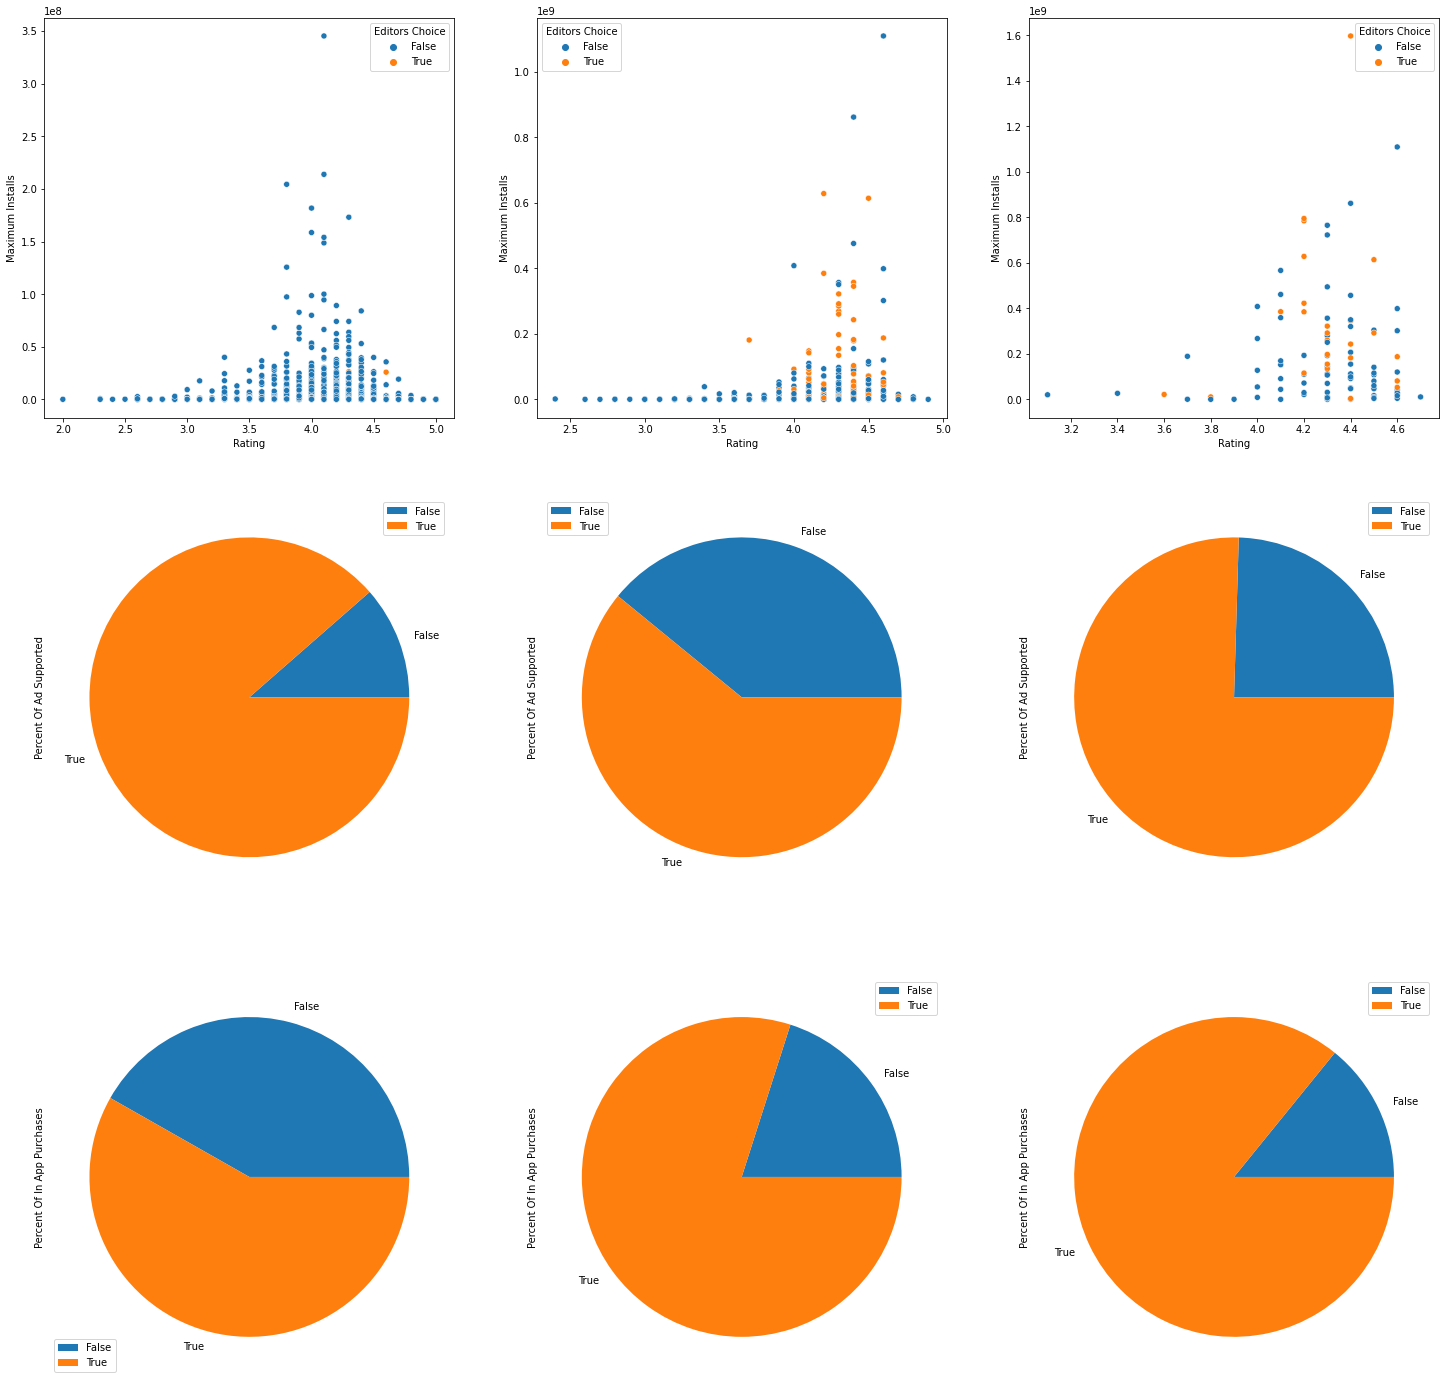

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(25, 25))

sns.scatterplot(data = MostMadeDev, x = 'Rating',y= 'Maximum Installs', ax= ax[0][0], hue ='Editors Choice')
sns.scatterplot(data = MostEditorDev, x = 'Rating',y= 'Maximum Installs', ax= ax[0][1], hue ='Editors Choice',  color = 'Red')
sns.scatterplot(data = MostDownloadDev, x = 'Rating',y= 'Maximum Installs', ax= ax[0][2], hue ='Editors Choice', color = 'Green')

MostMadeDev.groupby('Ad Supported').count().plot.pie(y = 'App Name', label = 'Percent Of Ad Supported', ax = ax[1][0])
MostEditorDev.groupby('Ad Supported').count().plot.pie(y = 'App Name', label = 'Percent Of Ad Supported', ax = ax[1][1])
MostDownloadDev.groupby('Ad Supported').count().plot.pie(y = 'App Name', label = 'Percent Of Ad Supported', ax = ax[1][2])

MostMadeDev.groupby('In App Purchases').count().plot.pie(y = 'App Name', label = 'Percent Of In App Purchases', ax = ax[2][0])
MostEditorDev.groupby('In App Purchases').count().plot.pie(y = 'App Name', label = 'Percent Of In App Purchases', ax = ax[2][1])
MostDownloadDev.groupby('In App Purchases').count().plot.pie(y = 'App Name', label = 'Percent Of In App Purchases', ax = ax[2][2])


plt.show();

In [ ]:
MostMadeDev.info()
MostEditorDev.info()
MostDownloadDev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3006 entries, 1 to 150937
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   App Name              3006 non-null   object         
 1   Category              3006 non-null   object         
 2   Rating                2939 non-null   float64        
 3   Maximum Installs      3006 non-null   int64          
 4   Free                  3006 non-null   bool           
 5   Developer Id          3006 non-null   object         
 6   Released              3001 non-null   datetime64[ns] 
 7   Last Updated          3006 non-null   datetime64[ns] 
 8   Content Rating        3006 non-null   object         
 9   Ad Supported          3006 non-null   bool           
 10  In App Purchases      3006 non-null   bool           
 11  Editors Choice        3006 non-null   bool           
 12  Day Till Last Update  3006 non-null   timedelta64[ns]
dtypes

#TIME

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150957 entries, 0 to 150956
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   App Name              150957 non-null  object         
 1   Category              150957 non-null  object         
 2   Rating                112953 non-null  float64        
 3   Maximum Installs      150957 non-null  int64          
 4   Free                  150957 non-null  bool           
 5   Developer Id          150957 non-null  object         
 6   Released              148375 non-null  datetime64[ns] 
 7   Last Updated          150957 non-null  datetime64[ns] 
 8   Content Rating        150957 non-null  object         
 9   Ad Supported          150957 non-null  bool           
 10  In App Purchases      150957 non-null  bool           
 11  Editors Choice        150957 non-null  bool           
 12  Day Till Last Update  150957 non-null  timed

In [ ]:
NumberOFAppThroughTime = games.groupby('Released').count()[['App Name']].resample('M').sum()

In [ ]:
games['Month'] = games['Released'].dt.month

In [ ]:
NumberOFAppThroughTime = NumberOFAppThroughTime.head(131)

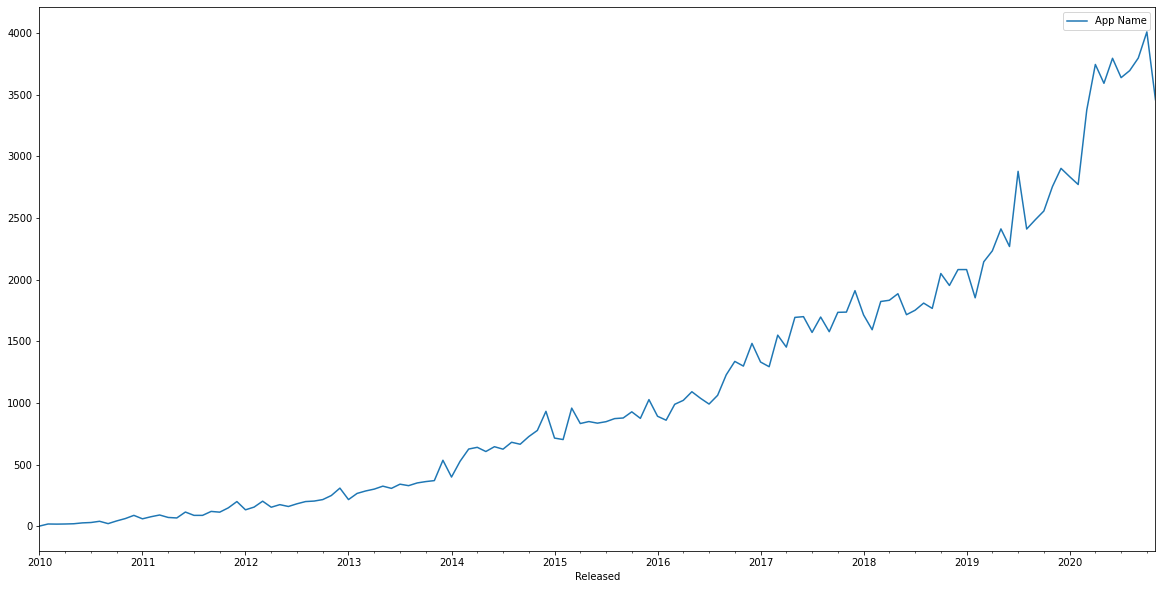

In [ ]:
NumberOFAppThroughTime.plot(figsize = (20,10))

In [ ]:
NumberOFAppThroughTime= NumberOFAppThroughTime.reset_index()
MostDownloadDev= MostDownloadDev.reset_index()
MostEditorDev= MostEditorDev.reset_index()
MostMadeDev= MostMadeDev.reset_index()
BadDevData= BadDevData.reset_index()

In [ ]:
NumberOFAppThroughTime=NumberOFAppThroughTime.drop(labels = ['level_0','index'], axis = 1)
MostDownloadDev=MostDownloadDev.drop(labels = ['level_0','index'], axis = 1)
MostEditorDev=MostEditorDev.drop(labels = ['level_0','index'], axis = 1)
MostMadeDev=MostMadeDev.drop(labels = ['level_0','index'], axis = 1)
BadDevData=BadDevData.drop(labels = ['level_0','index'], axis = 1)


In [ ]:
NumberOFAppThroughTime.to_csv('NumberOFAppThroughTime.csv')
MostDownloadDev.to_csv('MostDownloadDev.csv')
MostEditorDev.to_csv('MostEditorDev.csv')
MostMadeDev.to_csv('MostMadeDev.csv')
BadDevData.to_csv('BadDevData.csv')
games.to_csv('games.csv')

In [ ]:
MostDownloadDev.info()

NameError: ignored

# Pipeline

In [ ]:
# Connect to Google Sheets
!pip install --upgrade oauth2client gspread

Requirement already up-to-date: oauth2client in /usr/local/lib/python3.7/dist-packages (4.1.3)
Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)


In [ ]:
from google.colab import auth
auth.authenticate_user()

# Import neccessary libraries
import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import set_with_dataframe

In [ ]:
# Authorize Google Sheets API
gc = gspread.authorize(GoogleCredentials.get_application_default())

# Create a new Google Spreadsheets
sh = gc.create('Game_storeFinal')

# In case you already have one
# sh = gc.open_by_key('1ZxgtKYktr23s-gmweWNpInz-CjcKLPGai8iSlqNfTJk')

# Choose the sheet to write

worksheet = sh.get_worksheet(0) #-> 0 - first sheet, 1 - second sheet etc. 
set_with_dataframe(worksheet, games)

# APPEND DATA TO SHEET
worksheet = sh.add_worksheet(title="MostDownloadDev", rows="10000", cols="20")
worksheet = sh.get_worksheet(1) #-> 0 - first sheet, 1 - second sheet etc. 
set_with_dataframe(worksheet, MostDownloadDev) #-> THIS EXPORTS YOUR DATAFRAME TO THE GOOGLE SHEET

worksheet = sh.add_worksheet(title="MostEditorDev", rows="10000", cols="20")
worksheet = sh.get_worksheet(2) #-> 0 - first sheet, 1 - second sheet etc. 
set_with_dataframe(worksheet, MostEditorDev) #-> THIS EXPORTS YOUR DATAFRAME TO THE GOOGLE SHEET

worksheet = sh.add_worksheet(title="MostMadeDev", rows="10000", cols="20")
worksheet = sh.get_worksheet(3) #-> 0 - first sheet, 1 - second sheet etc. 
set_with_dataframe(worksheet, MostMadeDev) #-> THIS EXPORTS YOUR DATAFRAME TO THE GOOGLE SHEET


worksheet = sh.add_worksheet(title="BadDevData", rows="10000", cols="20")
worksheet = sh.get_worksheet(4) #-> 0 - first sheet, 1 - second sheet etc. 
set_with_dataframe(worksheet, BadDevData) #-> THIS EXPORTS YOUR DATAFRAME TO THE GOOGLE SHEET

worksheet = sh.add_worksheet(title="NumberOFAppThroughTime", rows="10000", cols="20")
worksheet = sh.get_worksheet(5) #-> 0 - first sheet, 1 - second sheet etc. 
set_with_dataframe(worksheet, NumberOFAppThroughTime) #-> THIS EXPORTS YOUR DATAFRAME TO THE GOOGLE SHEET


